In [13]:
import pandas as pd

df = pd.DataFrame({
    "Department": ["HR", "HR", "IT", "IT", "Finance", "Finance"],
    "Month": ["Jan", "Feb", "Jan", "Feb", "Jan", "Feb"],
    "Salary": [50000, 52000, 60000, 62000, 58000, 59000]
})

pivot = df.pivot_table(values="Salary", index="Department", columns="Month", aggfunc="mean")
pivot


Month,Feb,Jan
Department,,
Finance,59000.0,58000.0
HR,52000.0,50000.0
IT,62000.0,60000.0


In [ ]:
# Stack: Columns -> Index
stacked = pivot.stack()

unstacked = stacked.unstack()


In [8]:
stacked

Department  Month
Finance     Feb      59000.0
            Jan      58000.0
HR          Feb      52000.0
            Jan      50000.0
IT          Feb      62000.0
            Jan      60000.0
dtype: float64

In [9]:
unstacked

Month,Feb,Jan
Department,,
Finance,59000.0,58000.0
HR,52000.0,50000.0
IT,62000.0,60000.0


In [10]:
df_wide = pd.DataFrame({
    "Name": ["Akshat", "Neha"],
    "Math": [90, 85],
    "Science": [88, 92]
})

df_long = pd.melt(df_wide, id_vars=["Name"], value_vars=["Math", "Science"],
                  var_name="Subject", value_name="Marks")


In [11]:
df_long

,Name,Subject,Marks
0,Akshat,Math,90
1,Neha,Math,85
2,Akshat,Science,88
3,Neha,Science,92


In [12]:
df_wide


,Name,Math,Science
0,Akshat,90,88
1,Neha,85,92



Sorting and Ranking:


In [16]:
# Sorting the DataFrame by Department in descending order
df_sorted = df.sort_values(by="Department", ascending=False)
df_sorted

,Department,Month,Salary
2,IT,Jan,60000
3,IT,Feb,62000
0,HR,Jan,50000
1,HR,Feb,52000
4,Finance,Jan,58000
5,Finance,Feb,59000


In [17]:
#Rank the values in a DataFrame.
df_sorted["Rank"] = df_sorted["Salary"].rank(ascending=False)
df_sorted

,Department,Month,Salary,Rank
2,IT,Jan,60000,2.0
3,IT,Feb,62000,1.0
0,HR,Jan,50000,6.0
1,HR,Feb,52000,5.0
4,Finance,Jan,58000,4.0
5,Finance,Feb,59000,3.0


Handling Time Series Data

In [21]:
import pandas as pd
import numpy as np

# Generate 30 days of data
date_rng = pd.date_range(start="2024-01-01", end="2024-01-30", freq='D')
df = pd.DataFrame({
    "Date": date_rng,
    "Sales": np.random.randint(100, 500, size=(30))
})


In [24]:
# Convert the Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,Sales
0,2024-01-01,413
1,2024-01-02,360
2,2024-01-03,394
3,2024-01-04,102
4,2024-01-05,288
5,2024-01-06,282
6,2024-01-07,132
7,2024-01-08,166
8,2024-01-09,342
9,2024-01-10,206


In [26]:
# Set the Date column as the index
df.set_index("Date", inplace=True)
# Weekly total sales
weekly_sales = df.resample('W').sum()

# Weekly average sales
weekly_avg_sales = df.resample('W').mean()


Matplotlib is building the font cache; this may take a moment.


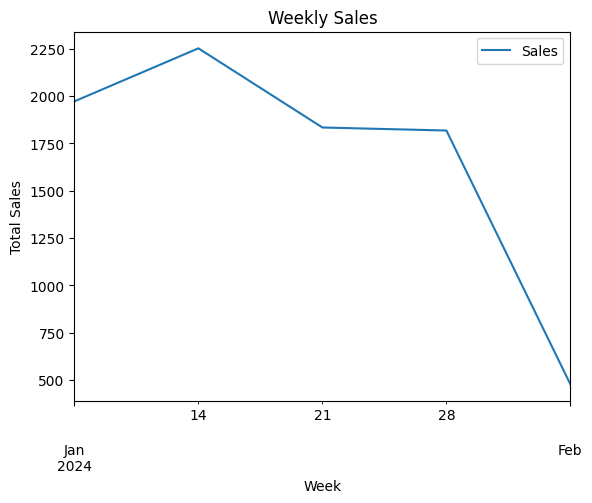

In [27]:
import matplotlib.pyplot as plt

weekly_sales.plot(title="Weekly Sales")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.show()
